In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=3, max_iters=10, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps     

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

In [6]:
import cv2


In [7]:
image = cv2.imread("flower3.png")

In [8]:
image1 = cv2.imread("fruits.png")

In [9]:
image2 = cv2.imread("flower1.png")

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

In [12]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

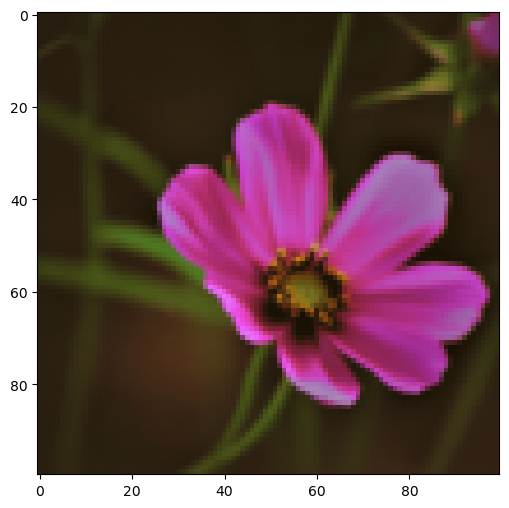

In [13]:
plt.figure(figsize=(6, 6))
plt.imshow(image)

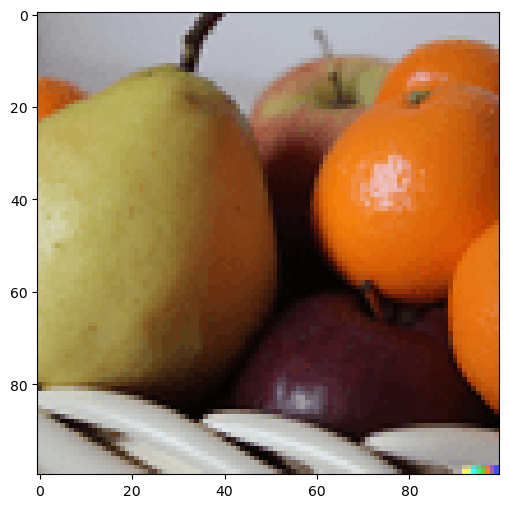

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(image1)

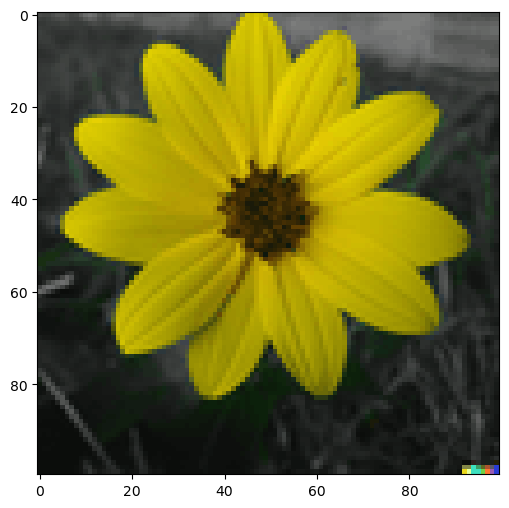

In [15]:
plt.figure(figsize=(6, 6))
plt.imshow(image2)

In [16]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [17]:
pixel_values1 = image1.reshape((-1, 3))
pixel_values1 = np.float32(pixel_values1)

In [18]:
pixel_values2 = image2.reshape((-1, 3))
pixel_values2 = np.float32(pixel_values2)

In [19]:
print(pixel_values.shape)

(10000, 3)


In [20]:
print(pixel_values1.shape)

(10000, 3)


In [21]:
print(pixel_values2.shape)

(10000, 3)


In [22]:
k = KMeans(K=3, max_iters=20)
y_pred = k.predict(pixel_values)
k.cent()

array([[150.68251038,  49.54427719,  90.89740753],
       [184.30218506,  70.6193161 , 165.85856628],
       [ 50.26174927,  39.73182678,  18.29374695]])

In [23]:
centers = np.uint8(k.cent())

In [24]:
centers

array([[150,  49,  90],
       [184,  70, 165],
       [ 50,  39,  18]], dtype=uint8)

In [25]:
y_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [26]:
y_pred = y_pred.astype(int)

In [27]:
np.unique(y_pred)

array([0, 1, 2])

In [28]:
labels = y_pred.flatten()

In [29]:
segmented_image = centers[labels.flatten()]

In [30]:
segmented_image = segmented_image.reshape(image.shape)

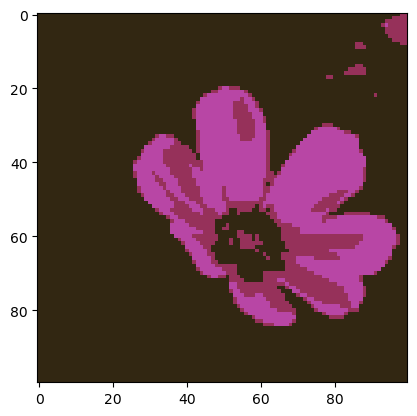

In [31]:
plt.imshow(segmented_image)
plt.show()

In [32]:
masked_image = np.copy(image)  

In [33]:
masked_image = masked_image.reshape((-1, 3))

In [34]:
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]

In [35]:
masked_image = masked_image.reshape(image.shape)

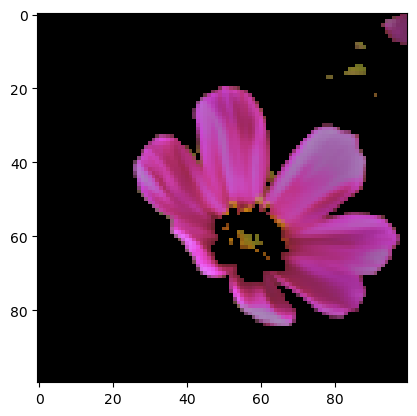

In [36]:
plt.imshow(masked_image)
plt.show()

In [57]:
k = KMeans(K=10, max_iters=20)
y_pred1 = k.predict(pixel_values1)
k.cent()

array([[146.82763672,  87.02822876,  34.00743103],
       [160.06108093, 136.44299316,  74.34445953],
       [ 24.08517265,   9.19137764,   8.29652977],
       [ 60.03800583,  24.91469574,  22.30067635],
       [164.6111145 , 161.42753601, 160.9879303 ],
       [216.95832825, 106.34596252,  19.93244934],
       [193.11082458, 193.88258362, 195.04682922],
       [114.18308258,  60.26187897,  23.15527153],
       [101.00371552,  82.34572601,  75.18215942],
       [188.99226379, 173.92477417, 100.75221252]])

In [58]:
centers1 = np.uint8(k.cent())

In [59]:
y_pred1

array([4., 4., 4., ..., 5., 4., 4.])

In [60]:
y_pred1 = y_pred1.astype(int)

In [61]:
np.unique(y_pred1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
labels1 = y_pred1.flatten() 

In [63]:
segmented_image1 = centers1[labels1.flatten()]

In [64]:
segmented_image1 = segmented_image1.reshape(image1.shape)

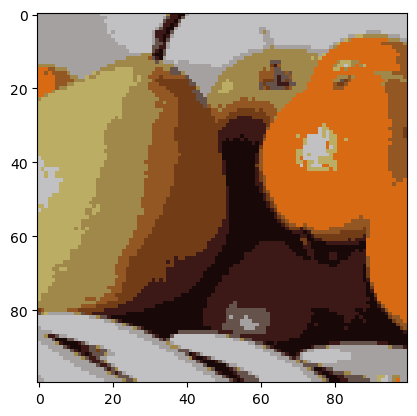

In [65]:
plt.imshow(segmented_image1)
plt.show()

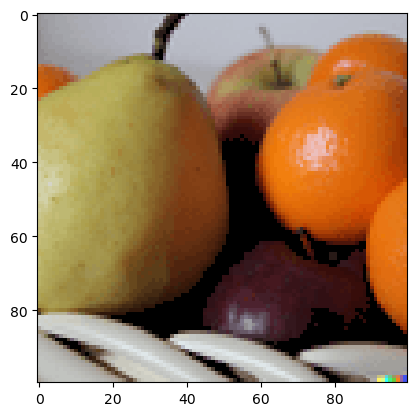

In [66]:
masked_image1 = np.copy(image1)  
masked_image1 = masked_image1.reshape((-1, 3))    
cluster = 2
masked_image1[labels1 == cluster] = [0, 0, 0]
masked_image1 = masked_image1.reshape(image1.shape)
plt.imshow(masked_image1)
plt.show()


In [67]:
k = KMeans(K=15, max_iters=20)
y_pred2 = k.predict(pixel_values2)
k.cent()

array([[ 17.79608345,  22.82085228,  16.59331703],
       [214.91085815, 196.22674561,   2.82364345],
       [201.76069641, 182.62834167,   3.14037442],
       [ 32.11621475,  36.83576965,  32.83298492],
       [174.05229187, 158.95751953,   3.52287579],
       [ 66.30612183,  70.35250092,  64.07791901],
       [182.47993469, 166.80769348,   3.0785954 ],
       [151.97901917, 140.98600769,   4.0675993 ],
       [ 67.44493103,  51.85021973,   6.87224674],
       [ 48.87082291,  53.78952026,  51.1933136 ],
       [102.20987701, 104.53791809, 102.97531128],
       [104.193367  ,  98.01104736,  14.21546936],
       [133.95327759, 124.43457794,   5.76168203],
       [191.59342957, 174.35127258,   3.08370709],
       [163.40475464, 150.91905212,   3.58571434]])

In [68]:
centers2 = np.uint8(k.cent())


In [69]:
y_pred2


array([ 5.,  5.,  5., ...,  2., 10., 10.])

In [70]:
y_pred2 = y_pred2.astype(int)

In [71]:
np.unique(y_pred2)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [72]:
labels2 = y_pred2.flatten()


In [73]:
segmented_image2 = centers2[labels2.flatten()]

In [74]:
segmented_image2 = segmented_image2.reshape(image2.shape)


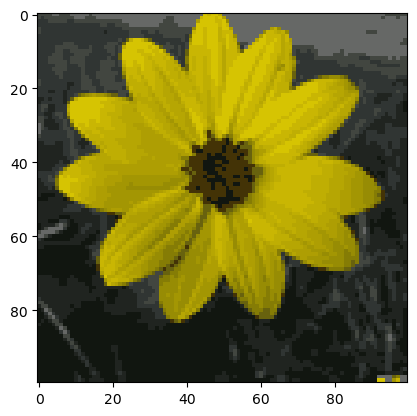

In [75]:
plt.imshow(segmented_image2)
plt.show()